# Pairs Finding
1. use Hierarchical Clustering
2. use fundemental approach to find industry neutural pairs
3. use information 

In [70]:
from polygon.rest import RESTClient

client = RESTClient("5MKBfYvCSCPekWl824p5l2aSHIIjqh_p")
main_exchanges = ["XNYS", "XNAS", "XASE"] 
tickers = []
for ex in main_exchanges:
	for t in client.list_tickers(
		market="stocks",
		exchange=ex,
		active="true",
		order="asc",
		limit="100",
		sort="ticker",
	):
		tickers.append(t.ticker)

tickers = list(set(tickers))
print(tickers)


['TVRD', 'NEWT', 'EMB', 'FHB', 'QAT', 'LSF', 'ZVIA', 'ERAS', 'FLGpA', 'ATIIW', 'EQC', 'TBMCR', 'MUX', 'APLS', 'PSC', 'FLOC', 'AIV', 'DIBS', 'SHEN', 'GBAB', 'BOWNU', 'RAMP', 'DRS', 'EFSI', 'HUDI', 'GOF', 'ACLO', 'BKE', 'ALSN', 'MFG', 'FMTO', 'INDV', 'KLAC', 'SYPR', 'RMTI', 'AIFE', 'SYFpA', 'ATHR', 'BCVpA', 'WFG', 'COST', 'RKLB', 'GIFT', 'DTB', 'LAD', 'ETR', 'AISP', 'VHC', 'QXQ', 'CNMD', 'SHMD', 'AKRO', 'AFGC', 'NXPL', 'CBZ', 'NAN', 'AVPT', 'ALFUU', 'PNQI', 'LTRY', 'VLCN', 'HFRO', 'BORR', 'SRG', 'BBLGW', 'JUNS', 'CDTTW', 'CRSP', 'RLGT', 'BWXT', 'SFL', 'SEVN', 'ELME', 'NRIM', 'ATCH', 'PCGpC', 'AUPH', 'UAA', 'ATAT', 'FSI', 'CM', 'HTOO', 'ONB', 'THCH', 'TOI', 'EDTK', 'MLTX', 'VMEO', 'BSJS', 'MITTpA', 'PSTL', 'NUKKW', 'ABPWW', 'RUN', 'LCII', 'CRVL', 'LIN', 'THAR', 'CRK', 'BR', 'AIFEU', 'CDXS', 'TIRX', 'RZLVW', 'NVT', 'VRIG', 'RBOT', 'OSTX', 'ETW', 'JZ', 'RCKT', 'LAND', 'BRZE', 'RKT', 'CONI', 'FRST', 'DBL', 'MNY', 'ESOA', 'OSW', 'QQQH', 'ILIT', 'DRTS', 'CVV', 'KITTW', 'LYFT', 'VERI', 'ICHR', 

In [71]:
aggs = []
for a in client.list_aggs(
        "FHB",
        1,
        "day",
        "2020-04-01",
        "2025-04-01",
        adjusted="true",
        sort="asc",
        limit=50000,
    ):
        aggs.append(a.close)
print(len(aggs))

1242


In [72]:

import pandas as pd
import numpy as np

df = pd.DataFrame(
    columns=tickers
)

for t in tickers:
    aggs = []
    for a in client.list_aggs(
        t,
        1,
        "day",
        "2020-04-01",
        "2025-04-01",
        adjusted="true",
        sort="asc",
        limit=50000,
    ):
        
        aggs.append(a.close)
    if len(aggs) != 1242:
        continue
    df[t] = aggs


In [73]:
df = df.dropna(axis=1).copy()
train, test = df.iloc[:int(1243*0.8)].copy(), df.iloc[int(1243*0.8):].copy()
train = train.apply(lambda x: np.log(x))
train_standard = train.apply(lambda x: (x - x.mean())/ x.std())
X = train_standard.T 

In [135]:
test = test.apply(lambda x: np.log(x))

In [74]:
X

,0,1,2,3,4,5,6,7,8,9,...,984,985,986,987,988,989,990,991,992,993
NEWT,-0.925594,-0.867105,-0.728472,-0.841448,-0.852114,-0.849978,-1.126326,-1.086999,-0.996328,-0.927781,...,-1.946891,-2.035312,-1.952912,-1.899133,-1.768508,-1.843329,-1.723319,-1.757151,-1.712120,-1.530143
EMB,0.120423,0.086302,0.072771,0.148874,0.272531,0.286495,0.223460,0.223460,0.308166,0.273307,...,-0.616447,-0.591249,-0.597324,-0.598192,-0.566131,-0.601666,-0.667090,-0.663587,-0.646968,-0.650464
FHB,-1.699795,-1.584751,-1.176866,-1.319559,-1.132926,-1.325239,-1.478152,-1.504590,-1.675355,-1.805023,...,-0.264219,-0.373408,-0.364022,-0.373408,-0.268817,-0.216192,-0.319677,-0.396951,-0.380460,-0.366367
EQC,1.874100,1.886374,1.966413,1.817667,1.828289,1.845950,1.851238,1.837126,1.831825,1.854761,...,-1.610428,-1.660900,-1.705414,-1.714996,-1.689478,-1.667239,-1.711801,-1.686296,-1.721393,-1.708607
MUX,0.674280,0.700079,0.595365,0.529433,0.648231,0.466612,0.461568,0.559897,0.543076,0.383300,...,0.217758,0.217758,0.308340,0.305369,0.466892,0.530527,0.725634,0.776029,0.845036,0.813217
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
EMD,-0.021533,-0.040432,-0.087992,-0.026252,0.085778,0.053359,0.067278,0.140871,0.199882,0.145434,...,-0.702198,-0.675276,-0.648497,-0.621859,-0.590080,-0.548017,-0.553255,-0.574265,-0.605945,-0.659191
ICLN,-2.736377,-2.788780,-2.693171,-2.603774,-2.422063,-2.545153,-2.701779,-2.676005,-2.633375,-2.586946,...,-1.450857,-1.467175,-1.506583,-1.539691,-1.370146,-1.373347,-1.376550,-1.450857,-1.421633,-1.424871
FCBC,-1.526487,-1.396413,-1.115411,-1.094749,-0.691062,-1.035501,-1.191867,-1.231684,-1.531458,-1.639469,...,0.943440,0.792702,0.858280,0.770123,0.934045,1.019558,0.779812,0.698536,0.678844,0.734450
ATEC,-2.967823,-2.938984,-2.861203,-2.471838,-2.256625,-2.477895,-2.526839,-2.564128,-2.539212,-2.621028,...,0.568053,0.464076,0.543940,0.503274,0.582022,0.580031,0.613687,0.519613,0.521648,0.499174


In [75]:
from scipy.cluster.hierarchy import linkage
Z = linkage(X, method='single')
first_merges = Z[:3735//2]
first_merges

array([[8.07000000e+02, 3.27300000e+03, 4.05134834e-01, 2.00000000e+00],
       [1.01100000e+03, 3.73500000e+03, 4.65493324e-01, 3.00000000e+00],
       [1.34800000e+03, 1.97100000e+03, 5.08188266e-01, 2.00000000e+00],
       ...,
       [4.49000000e+02, 4.83500000e+03, 1.01569424e+01, 3.00000000e+00],
       [2.98500000e+03, 5.59800000e+03, 1.01575144e+01, 1.80300000e+03],
       [3.40500000e+03, 5.60000000e+03, 1.01597733e+01, 1.80400000e+03]],
      shape=(1867, 4))

In [76]:
tickers[3107], tickers[3108]

('KULR', 'CTApA')

In [104]:
from scipy.cluster.hierarchy import linkage
import heapq

def find_pairs_with_single_linkage(data):
    tickers = data.index.tolist()
    n = data.shape[0]
    Z = linkage(data, method='single')
    first_merges = Z[:n//2]

    pairs = []
    result = []
    for row in first_merges:
        idx1, idx2 = int(row[0]), int(row[1])
        if idx1 < n and idx2 < n:
            ticker1 = tickers[idx1]
            ticker2 = tickers[idx2]
            distance = row[2]
            heapq.heappush(pairs, (distance, ticker1, ticker2))
            if len(pairs) > 50:
                _, t1, t2 = heapq.heappop(pairs)
    
    while pairs:
        distance, t1, t2 = heapq.heappop(pairs)
        result.append((t1, t2, distance))

    result.reverse()
    return result

potential_pairs = find_pairs_with_single_linkage(X)
potential_pairs
    

[('BNTX', 'MRNA', np.float64(10.08292375999394)),
 ('HSY', 'PEP', np.float64(9.985007011331765)),
 ('SAN', 'EUFN', np.float64(9.89412203281896)),
 ('KO', 'CNP', np.float64(9.886565149481571)),
 ('SHO', 'XHR', np.float64(9.858054577179779)),
 ('OMCL', 'CLAR', np.float64(9.848834398346266)),
 ('RLJ', 'INN', np.float64(9.822124160937532)),
 ('GBCI', 'CBSH', np.float64(9.755681883799346)),
 ('LEVI', 'MHK', np.float64(9.718650103163743)),
 ('WHR', 'DLTH', np.float64(9.650320302455727)),
 ('QURE', 'BTAI', np.float64(9.584683252475244)),
 ('OTTR', 'COKE', np.float64(9.57147257287286)),
 ('PINC', 'ENTA', np.float64(9.474439905454735)),
 ('PCAR', 'FICO', np.float64(9.456570036682596)),
 ('EL', 'UGI', np.float64(9.424684030436568)),
 ('KLIC', 'NAVI', np.float64(9.402611224883971)),
 ('ADX', 'TQQQ', np.float64(9.385347880976447)),
 ('VRT', 'LII', np.float64(9.383841332653413)),
 ('CDC', 'AA', np.float64(9.3232840635266)),
 ('SUPV', 'BMA', np.float64(9.298237091942907)),
 ('CMG', 'MANH', np.float6

## Cointegration (Pairs validation)
We already find some pairs through clustering, now we need to validate these pairs from cointegration

In [106]:
from statsmodels.tsa.stattools import coint

def validate_pairs(df, pairs):
    result = []
    for t1, t2, _ in pairs:
        score, pvalue, _ = coint(df[t1], df[t2])

        result.append({
                'ticker1': t1,
                'ticker2': t2,
                'coint_score': score,
                'p_value': pvalue,
                'is_cointegrated': pvalue < 0.06  
            })
        
    result_df = pd.DataFrame(result)
    result_df = result_df.sort_values('p_value')
    
    return result_df

validate_pairs(train, potential_pairs)


,ticker1,ticker2,coint_score,p_value,is_cointegrated
43,PFGC,ENSG,-6.243463,4.757667e-07,True
38,CSL,MOH,-5.564210,1.329335e-05,True
15,KLIC,NAVI,-5.468963,2.068188e-05,True
40,FLEX,BMI,-5.411114,2.696237e-05,True
3,KO,CNP,-5.400826,2.825692e-05,True
34,PTMN,FLL,-5.237493,5.885006e-05,True
22,FORD,POLA,-5.214133,6.524927e-05,True
37,CAH,BELFB,-5.185879,7.388298e-05,True
47,IESC,FTAI,-5.160657,8.250611e-05,True
4,SHO,XHR,-5.149540,8.660537e-05,True


As we can see some of them are actually same company or same type of assets deliveried by different companies, after excluding such pairs, we still have about 5 pairs can be potential pairs targets, now let's pick one pair first (SUSC, VTC) to build some trading strategy

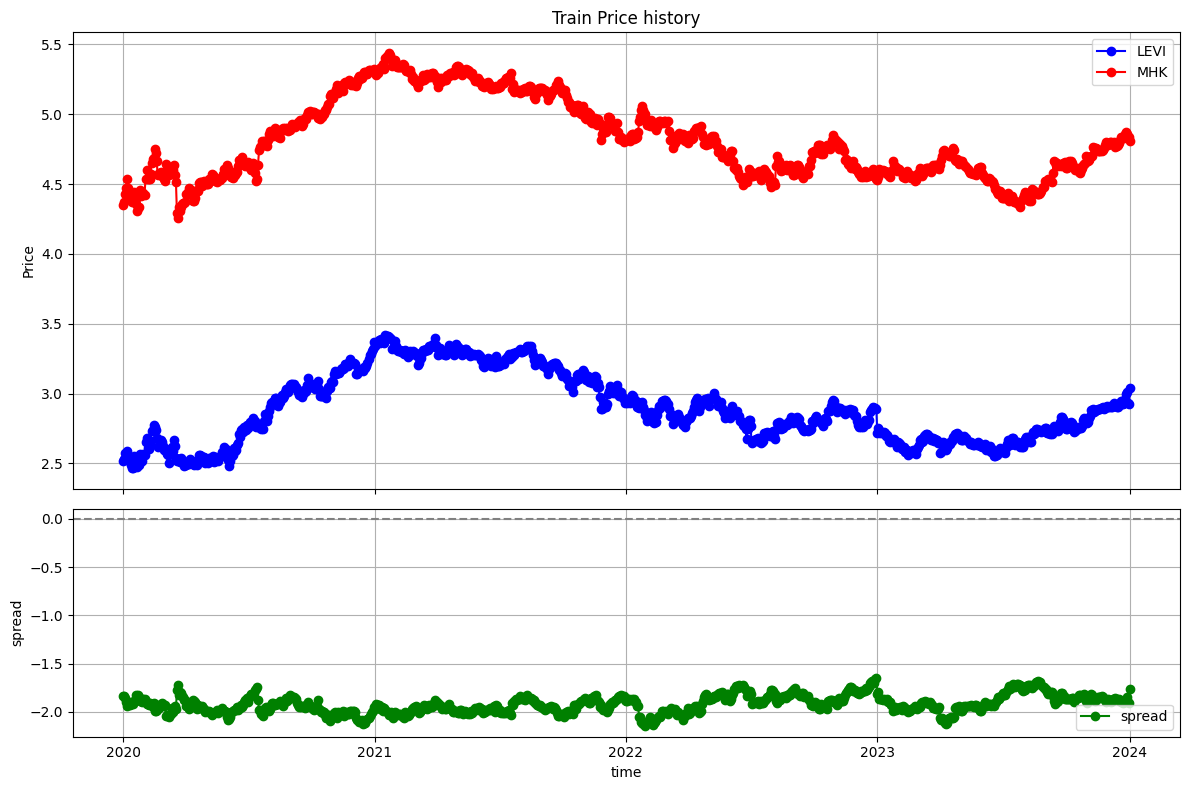

In [112]:
import matplotlib.pyplot as plt

def plot_price(a, b, train):

    stock_a = train[a]
    stock_b = train[b]
    spread = stock_a - stock_b

    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8), sharex=True, gridspec_kw={'height_ratios': [2, 1]})

    ax1.plot(stock_a, label=stock_a.name, color='blue', marker='o')
    ax1.plot(stock_b, label=stock_b.name, color='red', marker='o')
    ax1.set_title('Train Price history')
    ax1.set_ylabel('Price')
    ax1.legend()
    ax1.grid(True)

    data_length = len(stock_a)
    tick_positions = np.linspace(0, data_length-1, 5, dtype=int)
    tick_labels = ['2020', '2021', '2022', '2023', '2024']

    ax1.set_xticks(tick_positions)
    ax1.set_xticklabels([]) 

    ax2.plot(spread, label='spread', color='green', marker='o')
    ax2.set_xlabel('time')
    ax2.set_ylabel('spread')
    ax2.axhline(y=0, color='gray', linestyle='--') 
    ax2.grid(True)
    ax2.legend()

    ax2.set_xticks(tick_positions)
    ax2.set_xticklabels(tick_labels)

    plt.tight_layout()
    plt.show()

plot_price("LEVI", "MHK", train)

As we can see spread is jumping up and down around -2, which indicate good opportunity for pairs trading, let plot another one

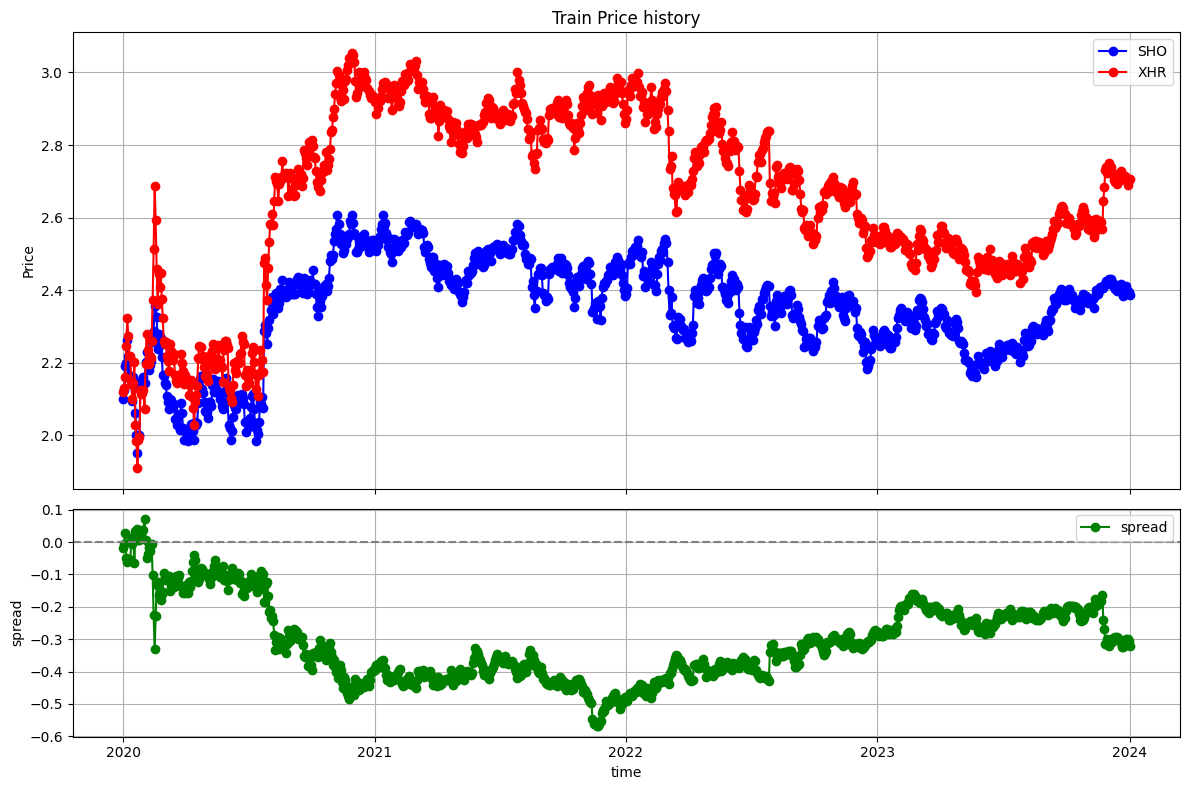

In [114]:
plot_price("SHO","XHR", train)

this above pair has some period with going up and down together period, which indicate we need to do some trend following strategy transition from pairs trading to increase profit

# Trading and Backtesting and forward testing

if the z score is too large, it means spread is too positive, so we long the l

In [158]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def hybrid_trading_strategy(test_data, ticker1, ticker2, train_mean, train_std):
    data = test_data.copy()
    
    data['spread'] = data[ticker1] - data[ticker2]
    
    data['zscore'] = (data['spread'] - train_mean) / train_std
    
    data[f'{ticker1}_ret'] = data[ticker1].pct_change(5)
    data[f'{ticker2}_ret'] = data[ticker2].pct_change(5)
    
    data[f'{ticker1}_trend'] = data[ticker1].rolling(10).mean() > data[ticker1].rolling(25).mean()
    data[f'{ticker2}_trend'] = data[ticker2].rolling(10).mean() > data[ticker2].rolling(25).mean()
    
    data['same_trend'] = data[f'{ticker1}_trend'] == data[f'{ticker2}_trend']
    data['strong_trend'] = (abs(data[f'{ticker1}_ret']) > 0.05) | (abs(data[f'{ticker2}_ret']) > 0.05)
    
    data['position'] = 0
    data['strategy'] = 'none'
    
    for i in range(1, len(data)):
        if data['position'].iloc[i-1] == 0:
            if abs(data['zscore'].iloc[i]) > 1 and data['same_trend'].iloc[i] and data['strong_trend'].iloc[i]:
                if data[f'{ticker1}_trend'].iloc[i]:
                    data.loc[data.index[i], 'position'] = 1 if data[f'{ticker1}_ret'].iloc[i] > data[f'{ticker2}_ret'].iloc[i] else -1
                    data.loc[data.index[i], 'strategy'] = 'trend_following'
                else:
                    data.loc[data.index[i], 'position'] = -1 if data[f'{ticker1}_ret'].iloc[i] > data[f'{ticker2}_ret'].iloc[i] else 1
                    data.loc[data.index[i], 'strategy'] = 'trend_following'
            elif data['zscore'].iloc[i] > 0.75:
                data.loc[data.index[i], 'position'] = -1
                data.loc[data.index[i], 'strategy'] = 'mean_reversion'
            elif data['zscore'].iloc[i] < -0.75:
                data.loc[data.index[i], 'position'] = 1
                data.loc[data.index[i], 'strategy'] = 'mean_reversion'
        else:
            if data['strategy'].iloc[i-1] == 'mean_reversion':
                if (data['position'].iloc[i-1] == 1 and data['zscore'].iloc[i] > -0.5) or \
                   (data['position'].iloc[i-1] == -1 and data['zscore'].iloc[i] < 0.5) or \
                   abs(data['zscore'].iloc[i]) > 2.0:
                    data.loc[data.index[i], 'position'] = 0
                    data.loc[data.index[i], 'strategy'] = 'none'
                else:
                    data.loc[data.index[i], 'position'] = data['position'].iloc[i-1]
                    data.loc[data.index[i], 'strategy'] = data['strategy'].iloc[i-1]
            elif data['strategy'].iloc[i-1] == 'trend_following':
                if (data['position'].iloc[i-1] == 1 and data[f'{ticker1}_ret'].iloc[i] < 0) or \
                   (data['position'].iloc[i-1] == -1 and data[f'{ticker1}_ret'].iloc[i] > 0) or \
                   data['same_trend'].iloc[i] == False:
                    data.loc[data.index[i], 'position'] = 0
                    data.loc[data.index[i], 'strategy'] = 'none'
                else:
                    data.loc[data.index[i], 'position'] = data['position'].iloc[i-1]
                    data.loc[data.index[i], 'strategy'] = data['strategy'].iloc[i-1]
    
    data['returns'] = data['position'].shift(1) * (data[ticker1] - data[ticker1].shift(1)) - \
                     data['position'].shift(1) * (data[ticker2] - data[ticker2].shift(1))
    
    data['cumulative_returns'] = data['returns'].cumsum()
    
    return data

def visualize_strategy(results, ticker1, ticker2):
    fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(14, 12), sharex=True)
    
    ax1.plot(results[ticker1], label=ticker1)
    ax1.plot(results[ticker2], label=ticker2)
    ax1.set_title('Price Movement')
    ax1.legend()
    ax1.grid(True)
    
    ax2.plot(results['zscore'], color='red')
    ax2.axhline(y=1.0, color='green', linestyle='--')
    ax2.axhline(y=-1.0, color='green', linestyle='--')
    ax2.axhline(y=0.4, color='black', linestyle='-.')
    ax2.axhline(y=-0.4, color='black', linestyle='-.')
    ax2.axhline(y=0, color='gray', linestyle='-')
    ax2.set_title('Z-Score')
    ax2.grid(True)
    
    mean_rev_signals = results[results['strategy'] == 'mean_reversion']
    trend_signals = results[results['strategy'] == 'trend_following']
    
    for idx, row in mean_rev_signals.iterrows():
        if row['position'] == 1:
            ax2.scatter(idx, row['zscore'], color='green', marker='^', s=100)
        elif row['position'] == -1:
            ax2.scatter(idx, row['zscore'], color='red', marker='v', s=100)
    
    for idx, row in trend_signals.iterrows():
        if row['position'] == 1:
            ax2.scatter(idx, row['zscore'], color='blue', marker='^', s=120, edgecolors='k')
        elif row['position'] == -1:
            ax2.scatter(idx, row['zscore'], color='purple', marker='v', s=120, edgecolors='k')
    
    ax3.plot(results['cumulative_returns'], color='blue')
    ax3.set_title('Cumulative Returns')
    ax3.grid(True)
    ax3.set_ylabel('time')
    
    plt.tight_layout()
    plt.show()
    
    print(f"total return: {results['cumulative_returns'].iloc[-1]:.2f}")
    print(f"MDD: {(results['cumulative_returns'] - results['cumulative_returns'].cummax()).min():.2f}")
    print(f"pairs trading times: {len(mean_rev_signals[mean_rev_signals['position'] != 0])}")
    print(f"trend following time: {len(trend_signals[trend_signals['position'] != 0])}")

def prepare_data_and_run(train_data, test_data, ticker1, ticker2):
    
    spread_train = train_data[ticker1] - train_data[ticker2]
    train_mean = spread_train.mean()
    train_std = spread_train.std()
    
    results = hybrid_trading_strategy(test_data, ticker1, ticker2, train_mean, train_std)
    visualize_strategy(results, ticker1, ticker2)
    
    return results

first let's see how it perform on training data

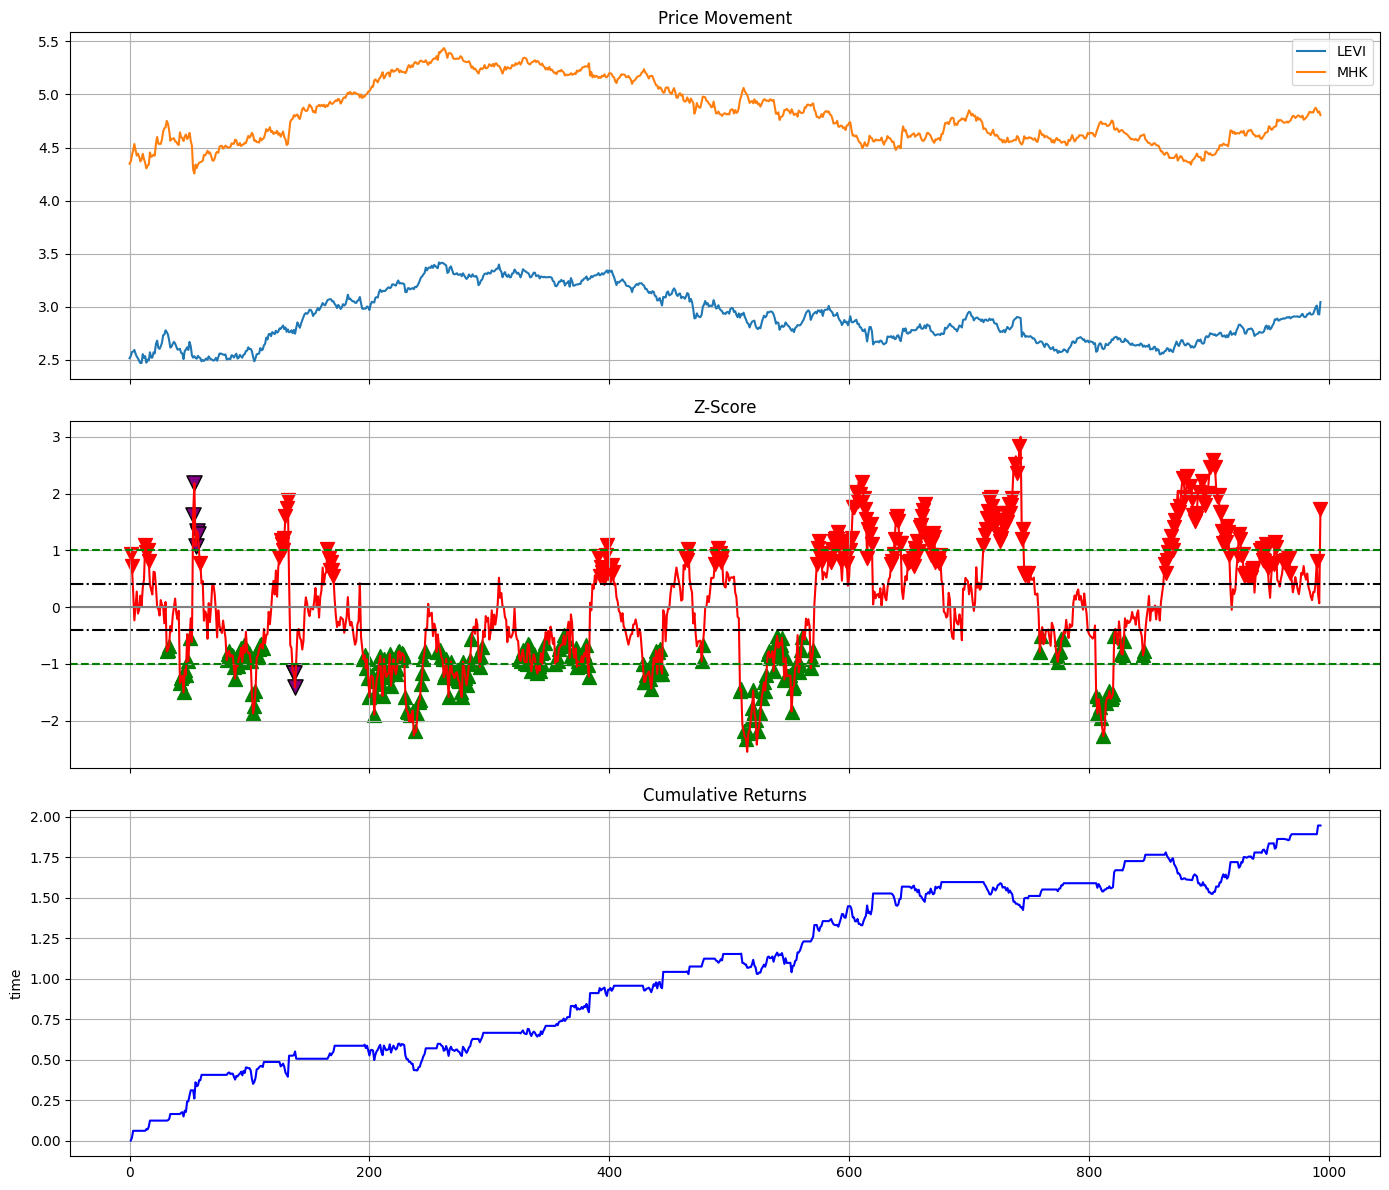

total return: 1.95
MDD: -0.26
pairs trading times: 489
trend following time: 8


In [153]:
train_trading = train[["LEVI", "MHK"]]
train_trading_data = prepare_data_and_run(train_trading, train_trading, "LEVI", "MHK")

it perform not bad and meet with out expectation, now let do test data

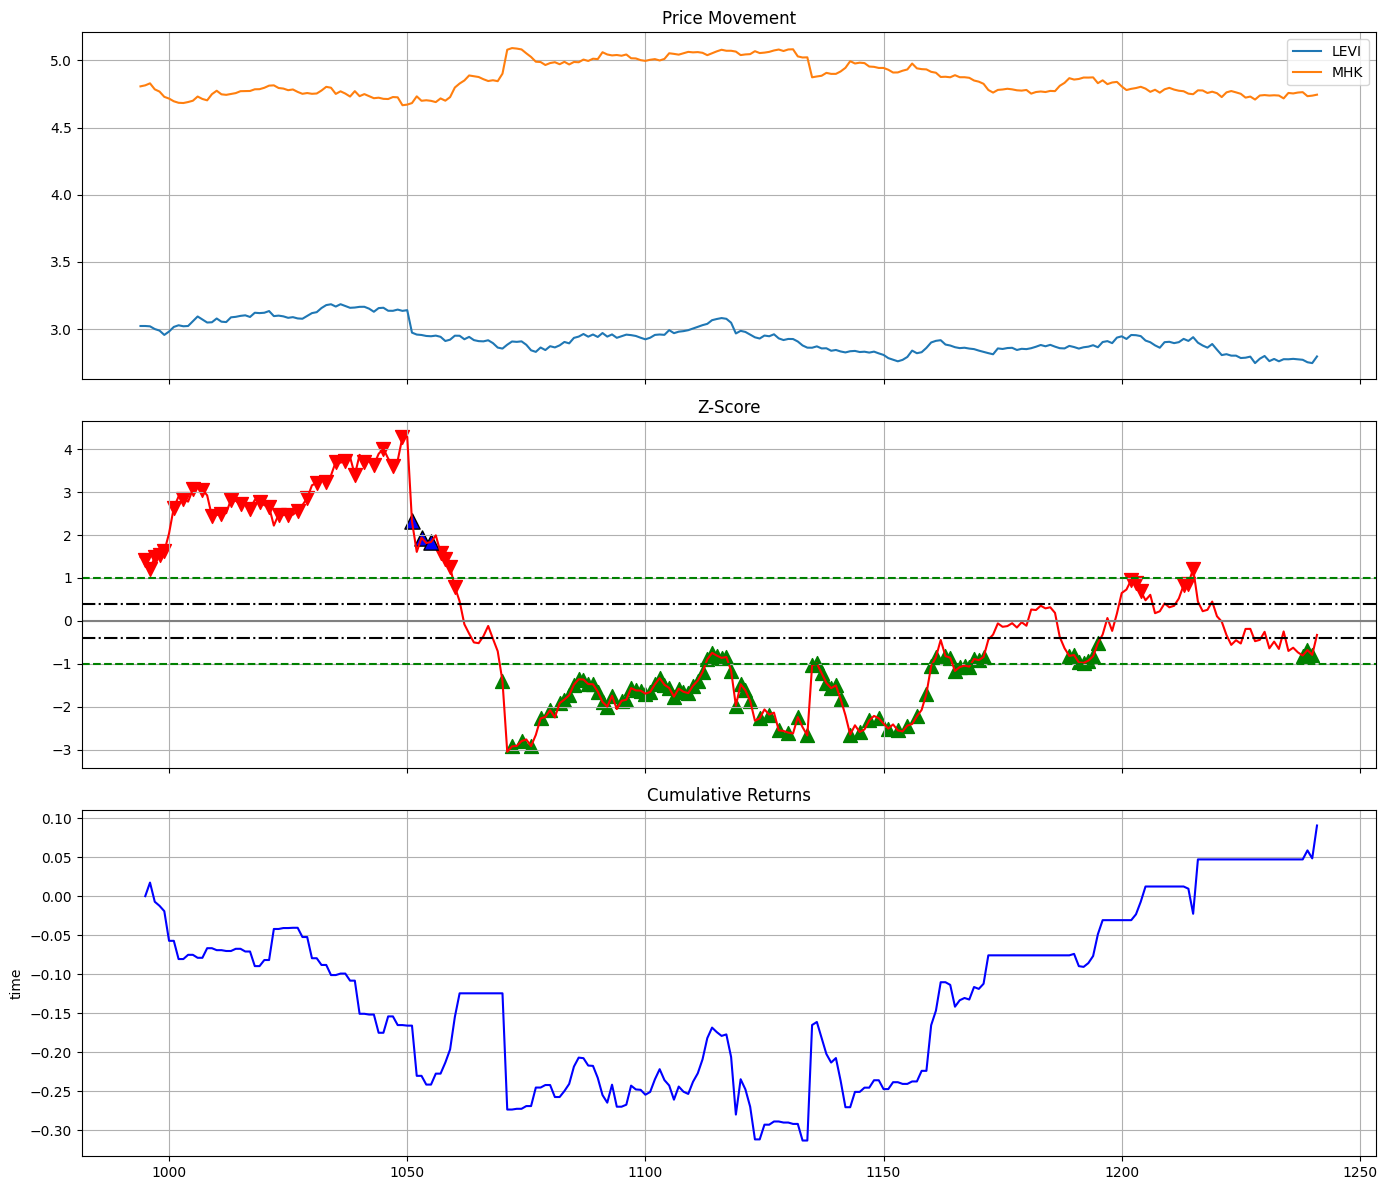

total return: 0.09
MDD: -0.33
pairs trading times: 129
trend following time: 3


In [174]:
train_trading = train[["LEVI", "MHK"]]
test_trading = test[["LEVI", "MHK"]]
test_trading_data = prepare_data_and_run(train_trading, test_trading, "LEVI", "MHK")

In [175]:
test_trading_data

,LEVI,MHK,spread,zscore,LEVI_ret,MHK_ret,LEVI_trend,MHK_trend,same_trend,strong_trend,position,strategy,returns,cumulative_returns
994,3.022861,4.806968,-1.784107,1.491099,NaN,NaN,False,False,True,False,0,none,NaN,NaN
995,3.022861,4.814539,-1.791678,1.407591,NaN,NaN,False,False,True,False,-1,mean_reversion,0.000000,0.000000
996,3.020425,4.829513,-1.809088,1.215581,NaN,NaN,False,False,True,False,-1,mean_reversion,0.017410,0.017410
997,3.000222,4.784738,-1.784516,1.486586,NaN,NaN,False,False,True,False,-1,mean_reversion,-0.024572,-0.007163
998,2.988708,4.767969,-1.779261,1.544535,NaN,NaN,False,False,True,False,-1,mean_reversion,-0.005254,-0.012417
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1237,2.775086,4.760977,-1.985891,-0.734350,-0.000897,0.004285,False,False,True,False,0,none,-0.000000,0.047124
1238,2.771338,4.763797,-1.992459,-0.806783,0.004104,0.005325,False,False,True,False,1,mean_reversion,-0.000000,0.047124
1239,2.753024,4.733915,-1.980892,-0.679212,-0.008173,0.003514,False,False,True,False,1,mean_reversion,0.011567,0.058691
1240,2.746630,4.737776,-1.991146,-0.792311,-0.010254,-0.004228,False,False,True,False,1,mean_reversion,-0.010255,0.048436


# Blotter and Lotter

In [168]:


def create_blotter(data, ticker1, ticker2, commission_rate=0.0005):
    blotter = []
    
    for i in range(1, len(data)):
        prev_pos = data['position'].iloc[i-1]
        curr_pos = data['position'].iloc[i]
        
        if prev_pos != curr_pos:
            trade_date = data.index[i]
            ticker1_price = data[ticker1].iloc[i]
            ticker2_price = data[ticker2].iloc[i]
            
            if prev_pos == 1:
                blotter.append([trade_date, ticker1, 'SELL', ticker1_price, 1, ticker1_price * 1 * commission_rate, data['strategy'].iloc[i-1], data['zscore'].iloc[i]])
                blotter.append([trade_date, ticker2, 'BUY', ticker2_price, 1, ticker2_price * 1 * commission_rate, data['strategy'].iloc[i-1], data['zscore'].iloc[i]])
            elif prev_pos == -1:
                blotter.append([trade_date, ticker1, 'BUY', ticker1_price, 1, ticker1_price * 1 * commission_rate, data['strategy'].iloc[i-1], data['zscore'].iloc[i]])
                blotter.append([trade_date, ticker2, 'SELL', ticker2_price, 1, ticker2_price * 1 * commission_rate, data['strategy'].iloc[i-1], data['zscore'].iloc[i]])
            
            if curr_pos == 1:
                blotter.append([trade_date, ticker1, 'BUY', ticker1_price, 1, ticker1_price * 1 * commission_rate, data['strategy'].iloc[i], data['zscore'].iloc[i]])
                blotter.append([trade_date, ticker2, 'SELL', ticker2_price, 1, ticker2_price * 1 * commission_rate, data['strategy'].iloc[i], data['zscore'].iloc[i]])
            elif curr_pos == -1:
                blotter.append([trade_date, ticker1, 'SELL', ticker1_price, 1, ticker1_price * 1 * commission_rate, data['strategy'].iloc[i], data['zscore'].iloc[i]])
                blotter.append([trade_date, ticker2, 'BUY', ticker2_price, 1, ticker2_price * 1 * commission_rate, data['strategy'].iloc[i], data['zscore'].iloc[i]])
    
    blotter_df = pd.DataFrame(blotter, columns=['date', 'ticker', 'action', 'price', 'quantity', 'commission', 'strategy', 'zscore'])
    return blotter_df

def create_lotter(blotter, initial_capital=100000):
    lotter = []
    
    capital = initial_capital
    positions = {}
    
    for i, row in blotter.iterrows():
        date = row['date']
        ticker = row['ticker']
        action = row['action']
        price = row['price']
        quantity = row['quantity']
        commission = row['commission']
        
        if action == 'BUY':
            capital -= price * quantity + commission
            positions[ticker] = positions.get(ticker, 0) + quantity
        else:
            capital += price * quantity - commission
            positions[ticker] = positions.get(ticker, 0) - quantity
        
        portfolio_value = capital
        for pos_ticker, pos_qty in positions.items():
            if pos_ticker in blotter['ticker'].unique():
                last_price = blotter[blotter['ticker'] == pos_ticker].iloc[-1]['price']
                portfolio_value += pos_qty * last_price
        
        lotter.append([date, ticker, action, price, quantity, commission, capital, portfolio_value])
    
    lotter_df = pd.DataFrame(lotter, columns=['date', 'ticker', 'action', 'price', 'quantity', 'commission', 'cash', 'portfolio_value'])
    return lotter_df

In [177]:
blotter = create_blotter(test_trading_data, "LEVI", "MHK")
blotter

,date,ticker,action,price,quantity,commission,strategy,zscore
0,995,LEVI,SELL,3.022861,1,0.001511,mean_reversion,1.407591
1,995,MHK,BUY,4.814539,1,0.002407,mean_reversion,1.407591
2,1000,LEVI,BUY,2.981633,1,0.001491,mean_reversion,2.039719
3,1000,MHK,SELL,4.715996,1,0.002358,mean_reversion,2.039719
4,1001,LEVI,SELL,3.016025,1,0.001508,mean_reversion,2.641388
...,...,...,...,...,...,...,...,...
227,1216,MHK,SELL,4.777189,1,0.002389,mean_reversion,0.449847
228,1238,LEVI,BUY,2.771338,1,0.001386,mean_reversion,-0.806783
229,1238,MHK,SELL,4.763797,1,0.002382,mean_reversion,-0.806783
230,1241,LEVI,SELL,2.796061,1,0.001398,mean_reversion,-0.327021


In [179]:
lotter = create_lotter(blotter)
lotter

,date,ticker,action,price,quantity,commission,cash,portfolio_value
0,995,LEVI,SELL,3.022861,1,0.001511,100003.021350,100000.225288
1,995,MHK,BUY,4.814539,1,0.002407,99998.204403,100000.153361
2,1000,LEVI,BUY,2.981633,1,0.001491,99995.221279,99999.966298
3,1000,MHK,SELL,4.715996,1,0.002358,99999.934917,99999.934917
4,1001,LEVI,SELL,3.016025,1,0.001508,100002.949433,100000.153372
...,...,...,...,...,...,...,...,...
227,1216,MHK,SELL,4.777189,1,0.002389,99999.600469,99999.600469
228,1238,LEVI,BUY,2.771338,1,0.001386,99996.827745,99999.623806
229,1238,MHK,SELL,4.763797,1,0.002382,100001.589160,99999.640202
230,1241,LEVI,SELL,2.796061,1,0.001398,100004.383823,99999.638804


let's test if we have trend following for another pair

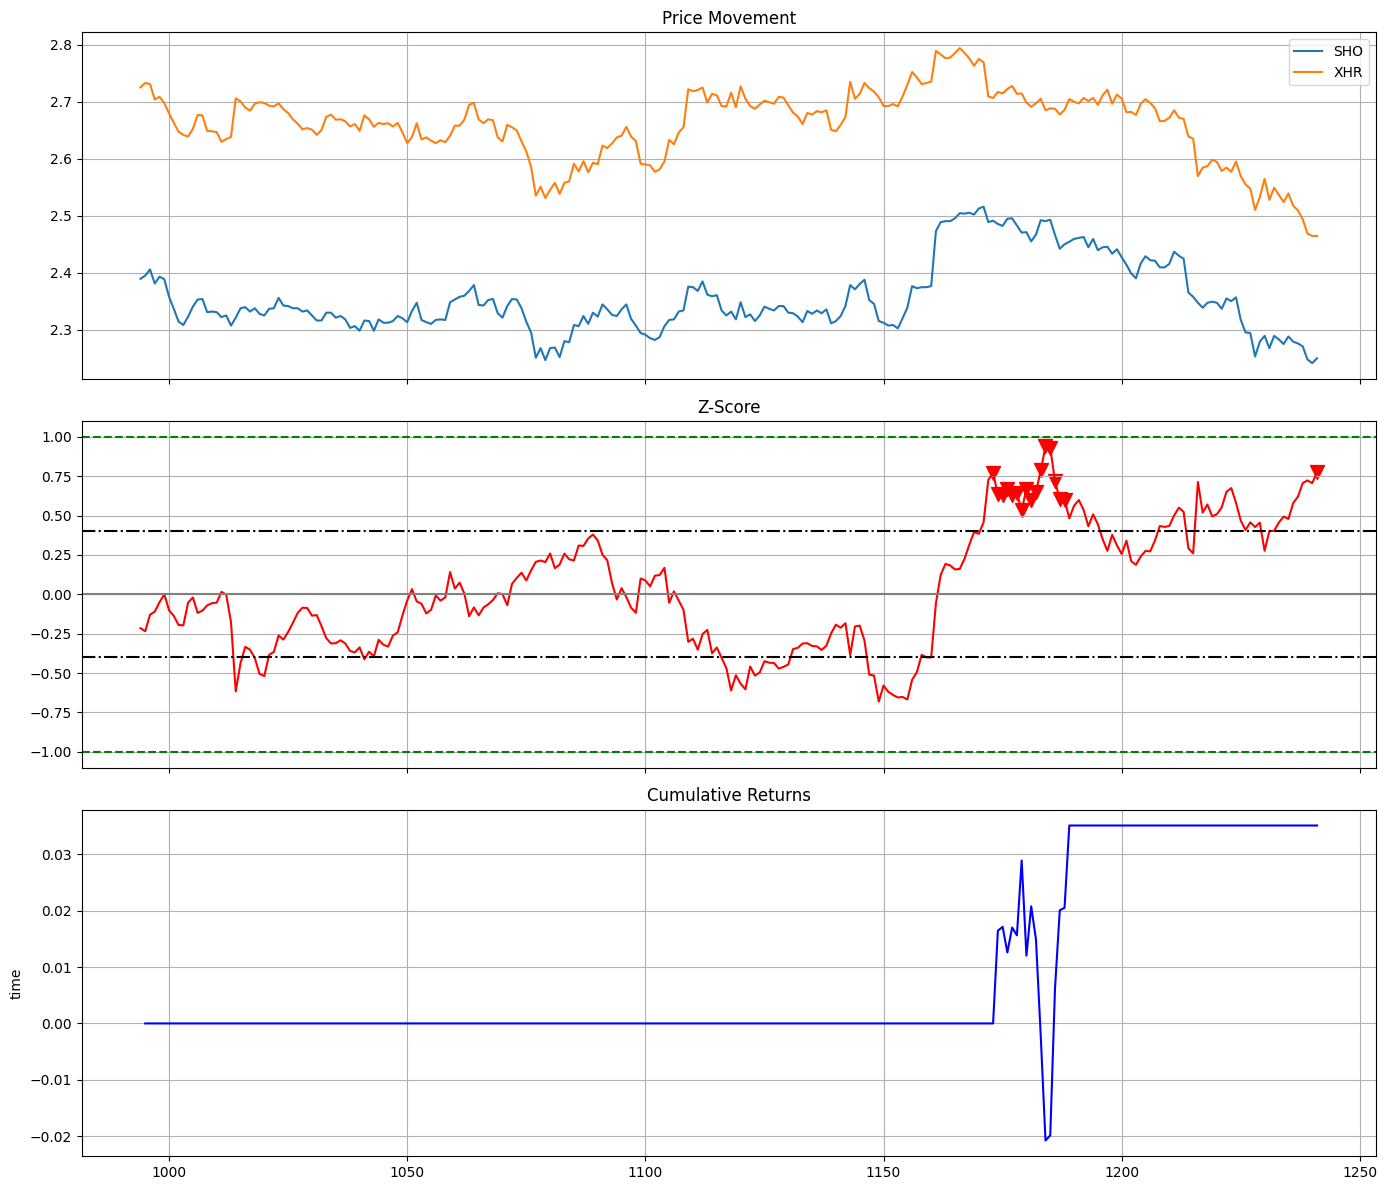

total return: 0.04
MDD: -0.05
pairs trading times: 17
trend following time: 0


In [163]:
train_trading = train[["SHO","XHR"]]
test_trading = test[["SHO","XHR"]]
test_trading_data = prepare_data_and_run(train_trading, test_trading, "SHO","XHR")

as we can see there is no trend following here, which indicate future improvement, in the future I will make the long and short at the same time and based on every pair's different maginitude consider different entry time and exit time